# Recipe Reviews and User Feedbacks

Objective:

The objective of this project is to develop a machine learning model that analyzes user reviews and feedback on recipes to extract meaningful insights, predict user preferences, and improve recipe recommendations.

Dataset Used : the Recipe Reviews and User Feedback Dataset from the UCI Machine Learning Repository

# Basic Preprocessing

In [2]:
#Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

In [4]:
# load dataset

In [5]:
df = pd.read_csv("C:\\Users\\anjal\\Desktop\\Recipe Reviews and User Feedback Dataset.csv",encoding="latin1")

In [6]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [7]:
df.tail()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


In [8]:
df.shape

(18182, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [10]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [11]:
# Finding Missing Values

In [12]:
df.isnull().sum()

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

In [13]:
# Handling missing values

In [14]:
imputer = SimpleImputer(strategy='most_frequent')
df[df.columns] = imputer.fit_transform(df)
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emilyâ??s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [15]:
df.isnull().sum()

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64

In [16]:
# finding duplicates

In [17]:
df.duplicated().sum()

0

No duplicates

In [18]:
# Detecting Outliers using IQR 

In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns  
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Identifying Outliers

In [21]:

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
outliers

Series([], dtype: float64)

In [22]:
# Handling Outliers

In [23]:
for col in numeric_cols:
    upper_limit = Q3[col] + 1.5 * IQR[col]
    lower_limit = Q1[col] - 1.5 * IQR[col]
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
print("\nOutliers Handled using IQR Method.\n")


Outliers Handled using IQR Method.



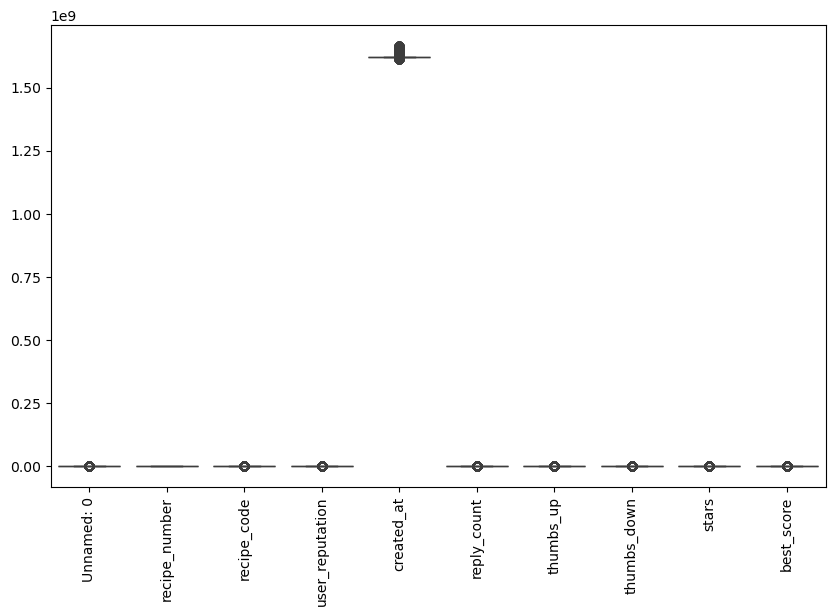

In [24]:
# Visualizing Outliers after Handling
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [25]:
# Encoding Categorical Data
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("\nCategorical Data Encoded.\n")


Categorical Data Encoded.



In [26]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,0,43,39,3409,13113,3046,1,2687,0,0,0,5,254,6774
1,1,0,43,39,3408,13275,4421,6,2682,0,7,0,5,421,1045
2,2,0,43,39,3407,13694,569,2,2655,0,3,0,5,407,4248
3,3,0,43,39,3406,13532,9424,1,2595,2,2,0,0,292,7625
4,4,0,43,39,3405,13432,7505,2,2671,1,7,0,0,511,16588


In [27]:
# Finding and Handling Skewness
df.skew()

Unnamed: 0          2.111974
recipe_number       0.458893
recipe_code         0.112060
recipe_name         0.104380
comment_id          0.000000
user_id             0.265459
user_name          -0.098873
user_reputation    13.495964
created_at          0.301908
reply_count        11.283080
thumbs_up           7.136933
thumbs_down        10.943803
stars              -2.128602
best_score          3.811751
text                0.000926
dtype: float64

In [28]:
df.head(3)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,0,43,39,3409,13113,3046,1,2687,0,0,0,5,254,6774
1,1,0,43,39,3408,13275,4421,6,2682,0,7,0,5,421,1045
2,2,0,43,39,3407,13694,569,2,2655,0,3,0,5,407,4248


In [46]:
df += abs(df.min()) + 1 

In [47]:
pt = PowerTransformer(method='box-cox')
df[df.columns] = pt.fit_transform(df)

In [50]:
df[df.columns] = df[df.columns] - df[df.columns].min()

In [51]:
df.skew()

Unnamed: 0         0.007417
recipe_number     -0.171090
recipe_code       -0.168407
recipe_name       -0.165910
comment_id        -0.177109
user_id           -0.182100
user_name         -0.193175
user_reputation    1.441645
created_at        -0.092529
reply_count        8.722244
thumbs_up          1.321390
thumbs_down        2.177394
stars             -1.251856
best_score         0.567204
text              -0.178378
dtype: float64

In [52]:
df.head(3)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0.000000,0.0,1.9725,1.773091,0.975877,3.499609,0.977936,5.501283,5.128725,0.0,0.000000,0.0,2.498099,14.502142,1.697840
1,0.243727,0.0,1.9725,1.773091,0.975657,3.524737,1.342349,11.403079,5.122593,0.0,2.403798,0.0,2.498099,14.569989,0.409265
2,0.407668,0.0,1.9725,1.773091,0.975437,3.589167,0.247508,8.102593,5.089413,0.0,2.402334,0.0,2.498099,14.566299,1.181203


In [32]:
# Feature selection 

In [53]:
x = df.drop(columns=['stars'],axis=1)
y = df['stars'].astype(int)

In [54]:
sk=SelectKBest(score_func=f_regression,k=10)

In [55]:
sk.fit_transform(x,y)

array([[ 0.        ,  0.        ,  1.97250044, ...,  0.        ,
         0.        , 14.5021423 ],
       [ 0.24372729,  0.        ,  1.97250044, ...,  2.40379845,
         0.        , 14.56998883],
       [ 0.4076677 ,  0.        ,  1.97250044, ...,  2.40233419,
         0.        , 14.5662993 ],
       ...,
       [ 2.99153573,  3.45624855,  3.54472547, ...,  0.        ,
         0.        , 11.92737862],
       [ 3.00079446,  3.45624855,  3.54472547, ...,  0.        ,
         0.        , 11.92737862],
       [ 3.00999498,  3.45624855,  3.54472547, ...,  2.38952531,
         0.        , 14.09738736]])

In [56]:
selected_features=x.columns[sk.get_support()]

In [57]:
scores = sk.scores_
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("\nFeature Scores in Descending Order:")
print(feature_scores)


Feature Scores in Descending Order:
            Feature       Score
11      thumbs_down  413.507064
9       reply_count  244.737549
0        Unnamed: 0   91.323886
1     recipe_number   90.705142
5           user_id   42.318520
8        created_at   22.985726
10        thumbs_up   21.926361
2       recipe_code   12.841711
4        comment_id    6.639081
12       best_score    6.636945
6         user_name    6.505799
13             text    2.833763
7   user_reputation    2.130717
3       recipe_name    2.116460


In [58]:
df.head(3)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0.000000,0.0,1.9725,1.773091,0.975877,3.499609,0.977936,5.501283,5.128725,0.0,0.000000,0.0,2.498099,14.502142,1.697840
1,0.243727,0.0,1.9725,1.773091,0.975657,3.524737,1.342349,11.403079,5.122593,0.0,2.403798,0.0,2.498099,14.569989,0.409265
2,0.407668,0.0,1.9725,1.773091,0.975437,3.589167,0.247508,8.102593,5.089413,0.0,2.402334,0.0,2.498099,14.566299,1.181203


In [39]:
# Scaling

In [59]:
x_selected = x[selected_features]

In [60]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x_selected)

In [42]:
# Splitting the Data

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [62]:
print(f"""
  x_train shape : {x_train.shape}
  x_test shape : {x_test.shape}
  y_train shape : {y_train.shape}
  y_test shape : {x_test.shape}
  """)


  x_train shape : (14545, 10)
  x_test shape : (3637, 10)
  y_train shape : (14545,)
  y_test shape : (3637, 10)
  
